# Projet SY09

In [39]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

## Évaluation des jeux de données candidats

- [Classification des clients (crédit social)](https://www.kaggle.com/datasets/parisrohan/credit-score-classification)
  - Sujet: Prédiction du score social d'un client (classification supervisée)
  - Deux jeux de données : un pour l'entraînement et un pour le test
  - Des valeurs manquantes éparpillées et des valeurs étranges (assimilables à des `NaN`)
- [Thyroïde](https://www.kaggle.com/datasets/aneevinay/thyroid-cancer-recurrence-dataset?select=filtered_thyroid_data.csv)
  - ⚠️ Sujet potentiel : Pourquoi il y a eu récidive ? (compliqué)
  - Pas tant de données que ça (300 lignes, 13 colonnes)
  - Pas de valeurs manquantes
  - **Bof bof**
- [Analyse de personnalité des clients](https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis)
  - Sujet : Segmentation des individus (?) (classification non supervisée 'clustering') 
  - Quasi essentiellement que des variables numériques
  - Très peu de valeurs manquantes
- [Prédiction d'obésité](https://www.kaggle.com/datasets/adeniranstephen/obesity-prediction-dataset)
  - Sujet : Prédiction de l'obésité (classification supervisée)
  - ⚠️ Pas de jeu de test (à générer ?)
  - Peu de modalités
  - Pas de valeurs manquantes
- [Pokémon](https://www.kaggle.com/datasets/kotsop/pokmon-detective-challenge)
  - Sujet: Prédiction de l'appartenance à la *Team Rocket* par la classification supervisée
  - 1000 valeurs manquantes dans la colonne *Team Rocket* : correspondent au jeu de test
  - Quelques variables qualitatives avec pas mal de modalités (environ 4 variables à 15 modalités)
  - **Intéressant**
- [Faillites de startup](https://www.kaggle.com/datasets/dagloxkankwanda/startup-failures)
  - ❌ Présence de variables qualitatives avec des valeurs non bornées
  - **Ne pas traiter ce jeu de données**

In [40]:
# df = pd.read_csv('./data/candidate_datasets/credit_score/train.csv')
# df = pd.read_csv('./data/candidate_datasets/filtered_thyroid_data/filtered_thyroid_data.csv')
# df = pd.read_csv('./data/candidate_datasets/marketing_campaign/marketing_campaign.csv', sep='\t')
# df = pd.read_csv('./data/candidate_datasets/obesity/ObesityDataSet_raw_and_data_sinthetic.csv')
# df = pd.read_csv('./data/candidate_datasets/pokemon_team_rocket_dataset/pokemon_team_rocket_dataset.csv')
df = pd.read_csv('./data/candidate_datasets/startup_failures/Startup Failure (Finance and Insurance).csv')

### Dimension du tableau individu-variable

In [41]:
print(f"{df.shape[0]} individus et {df.shape[1]} variables.")

47 individus et 20 variables.


### Premières lignes

In [42]:
df.head(n=20)

,Name,Sector,Years of Operation,What They Did,How Much They Raised,Why They Failed,Takeaway,Giants,No Budget,Competition,Poor Market Fit,Acquisition Stagnation,Platform Dependency,Monetization Failure,Niche Limits,Execution Flaws,Trend Shifts,Toxicity/Trust Issues,Regulatory Pressure,Overhype
0,Avant,Finance and Insurance,2012-2023,Online personal loans,$655M,Lost to LendingClub and high defaults,Lending needs risk balance,1,1,1,0,0,0,0,0,0,0,0,0,0.0
1,Bitpass,Finance and Insurance,2002-2008,Micropayments platform,$2M,Lost to PayPal and low adoption,Micropayments need mass use,1,0,1,1,0,0,0,0,0,0,0,0,0.0
2,Cake Financial,Finance and Insurance,2006-2011,Portfolio tracking tool,$3M,Lost to Mint and sold to TradeKing,Finance tools need scale,1,0,1,0,1,0,0,0,0,0,0,0,0.0
3,Circle,Finance and Insurance,2013-2023,Crypto payments and stablecoin,$500M,Lost to Coinbase and market shifts,Crypto needs stability,1,0,1,0,0,0,0,0,0,1,0,0,0.0
4,Clarity Money,Finance and Insurance,2016-2022,Personal finance app,$11M,Lost to Mint/Acorns and sold to Goldman,Finance apps need edge,1,0,1,0,1,0,0,0,0,0,0,0,0.0
5,Clinkle,Finance and Insurance,2011-2016,Mobile wallet,$30M,No product vs Apple Pay/PayPal,Execution over promises,1,0,1,0,0,0,0,0,1,0,0,0,1.0
6,Coinbase NFT,Finance and Insurance,2021-2023,NFT marketplace,$0 (Coinbase-funded),Lost to OpenSea and NFT crash,NFTs need timing,1,0,1,0,0,0,0,0,0,1,0,0,0.0
7,FundersClub,Finance and Insurance,2012-2022,Crowdfunding for startups,$20M,Lost to Kickstarter and low ROI,Crowdfunding needs hits,1,0,1,0,0,0,1,0,0,0,0,0,0.0
8,Fuze Network,Finance and Insurance,2010-2016,Prepaid card payments,$5M,Lost to Green Dot and small scale,Prepaid needs reach,1,0,1,0,0,0,0,1,0,0,0,0,0.0
9,Indiegogo Life,Finance and Insurance,2014-2019,Personal crowdfunding,$10M (est.),Lost to GoFundMe and niche focus,Personal funding needs appeal,1,0,1,1,0,0,0,1,0,0,0,0,0.0


### Types des colonnes

#### Toutes les colonnes

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Name                    47 non-null     object 
 1   Sector                  47 non-null     object 
 2   Years of Operation      47 non-null     object 
 3   What They Did           47 non-null     object 
 4   How Much They Raised    47 non-null     object 
 5   Why They Failed         47 non-null     object 
 6   Takeaway                47 non-null     object 
 7   Giants                  47 non-null     int64  
 8   No Budget               47 non-null     int64  
 9   Competition             47 non-null     int64  
 10  Poor Market Fit         47 non-null     int64  
 11  Acquisition Stagnation  47 non-null     int64  
 12  Platform Dependency     47 non-null     int64  
 13  Monetization Failure    47 non-null     int64  
 14  Niche Limits            47 non-null     int6

#### Variables qualitatives

In [44]:
qualitative_variables = df.select_dtypes(include=['object', 'category']).columns

print(f"{len(qualitative_variables)} variables qualitatives : \n")
for variable in qualitative_variables:
    print(f"{variable} ({df[variable].nunique()} modalités) : \n\t{df[variable].unique()}")

7 variables qualitatives : 

Name (47 modalités) : 
	['Avant' 'Bitpass' 'Cake Financial' 'Circle' 'Clarity Money' 'Clinkle'
 'Coinbase NFT' 'FundersClub' 'Fuze Network' 'Indiegogo Life' 'Isentium'
 'LendUp' 'LendingClub' 'LendLayer' 'Loyal3' 'Money360' 'Monitor110'
 'Mozido' 'Pawngo' 'Pay By Touch' 'Plum Will' 'PoundPay' 'ReadyForZero'
 'RushCard' 'Seed' 'Sensible' 'SigFig' 'Simple' 'SmartAsset' 'SoFi Social'
 'Square Cash' 'Taulia' 'Tilt' 'Toshl' 'TrustEgg' 'Upstart' 'Vemo'
 'Venmo Groups' 'Vittana' 'Wealthfront Cash' 'Wealthsimple Trade' 'Wepay'
 'Wesabe' 'Wise' 'YayPay' 'Ycharts' 'ZestFinance']
Sector (1 modalités) : 
	['Finance and Insurance']
Years of Operation (40 modalités) : 
	['2012-2023' '2002-2008' '2006-2011' '2013-2023' '2016-2022' '2011-2016'
 '2021-2023' '2012-2022' '2010-2016' '2014-2019' '2012-2020' '2012-2021'
 '2006-2021' '2013-2017' '2008-2018' '2005-2008' '2008-2017' '2011-2017'
 '2002-2007' '2015-2020' '2009-2013' '2010-2017' '2003-2018' '2012-2017'
 '2016-2020' '

#### Statistiques descriptives des variables numériques

In [45]:
df.describe()

,Giants,No Budget,Competition,Poor Market Fit,Acquisition Stagnation,Platform Dependency,Monetization Failure,Niche Limits,Execution Flaws,Trend Shifts,Toxicity/Trust Issues,Regulatory Pressure,Overhype
count,47.000000,47.000000,47.0,47.000000,47.000000,47.0,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,46.000000
mean,0.957447,0.063830,1.0,0.234043,0.255319,0.0,0.021277,0.191489,0.063830,0.042553,0.063830,0.063830,0.021739
std,0.204030,0.247092,0.0,0.427976,0.440755,0.0,0.145865,0.397727,0.247092,0.204030,0.247092,0.247092,0.147442
min,0.000000,0.000000,1.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,1.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.0,0.000000,0.500000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.0,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Valeurs manquantes

<Axes: >

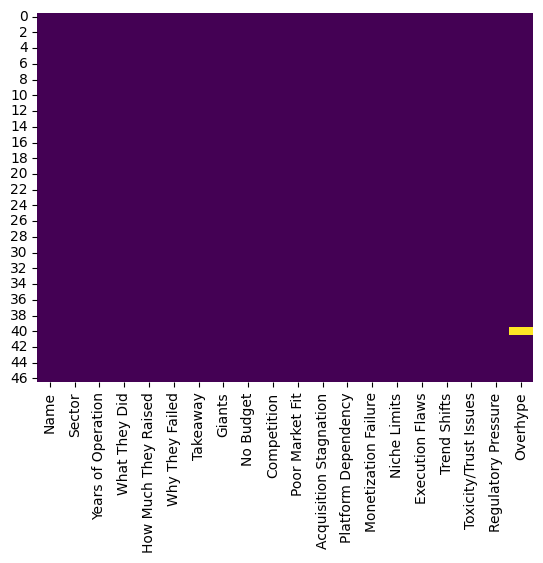

In [46]:
sns.heatmap(df.isna(), cbar=False, cmap='viridis')
# Yellow = missing values, Purple = no missing values

In [47]:
for column in df.columns:
    print(f"{column} : {df[column].isna().sum()} missing values")

Name : 0 missing values
Sector : 0 missing values
Years of Operation : 0 missing values
What They Did : 0 missing values
How Much They Raised : 0 missing values
Why They Failed : 0 missing values
Takeaway : 0 missing values
Giants : 0 missing values
No Budget : 0 missing values
Competition : 0 missing values
Poor Market Fit : 0 missing values
Acquisition Stagnation : 0 missing values
Platform Dependency : 0 missing values
Monetization Failure : 0 missing values
Niche Limits : 0 missing values
Execution Flaws : 0 missing values
Trend Shifts : 0 missing values
Toxicity/Trust Issues : 0 missing values
Regulatory Pressure : 0 missing values
Overhype : 1 missing values


### Tableau entier

In [48]:
display(df)

,Name,Sector,Years of Operation,What They Did,How Much They Raised,Why They Failed,Takeaway,Giants,No Budget,Competition,Poor Market Fit,Acquisition Stagnation,Platform Dependency,Monetization Failure,Niche Limits,Execution Flaws,Trend Shifts,Toxicity/Trust Issues,Regulatory Pressure,Overhype
0,Avant,Finance and Insurance,2012-2023,Online personal loans,$655M,Lost to LendingClub and high defaults,Lending needs risk balance,1,1,1,0,0,0,0,0,0,0,0,0,0.0
1,Bitpass,Finance and Insurance,2002-2008,Micropayments platform,$2M,Lost to PayPal and low adoption,Micropayments need mass use,1,0,1,1,0,0,0,0,0,0,0,0,0.0
2,Cake Financial,Finance and Insurance,2006-2011,Portfolio tracking tool,$3M,Lost to Mint and sold to TradeKing,Finance tools need scale,1,0,1,0,1,0,0,0,0,0,0,0,0.0
3,Circle,Finance and Insurance,2013-2023,Crypto payments and stablecoin,$500M,Lost to Coinbase and market shifts,Crypto needs stability,1,0,1,0,0,0,0,0,0,1,0,0,0.0
4,Clarity Money,Finance and Insurance,2016-2022,Personal finance app,$11M,Lost to Mint/Acorns and sold to Goldman,Finance apps need edge,1,0,1,0,1,0,0,0,0,0,0,0,0.0
5,Clinkle,Finance and Insurance,2011-2016,Mobile wallet,$30M,No product vs Apple Pay/PayPal,Execution over promises,1,0,1,0,0,0,0,0,1,0,0,0,1.0
6,Coinbase NFT,Finance and Insurance,2021-2023,NFT marketplace,$0 (Coinbase-funded),Lost to OpenSea and NFT crash,NFTs need timing,1,0,1,0,0,0,0,0,0,1,0,0,0.0
7,FundersClub,Finance and Insurance,2012-2022,Crowdfunding for startups,$20M,Lost to Kickstarter and low ROI,Crowdfunding needs hits,1,0,1,0,0,0,1,0,0,0,0,0,0.0
8,Fuze Network,Finance and Insurance,2010-2016,Prepaid card payments,$5M,Lost to Green Dot and small scale,Prepaid needs reach,1,0,1,0,0,0,0,1,0,0,0,0,0.0
9,Indiegogo Life,Finance and Insurance,2014-2019,Personal crowdfunding,$10M (est.),Lost to GoFundMe and niche focus,Personal funding needs appeal,1,0,1,1,0,0,0,1,0,0,0,0,0.0
